In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from pylamp.neural.sequentiel import Sequentiel
from pylamp.neural.layers import Linear
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps

## Loading Data

In [5]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

Label:  6
x size:  256


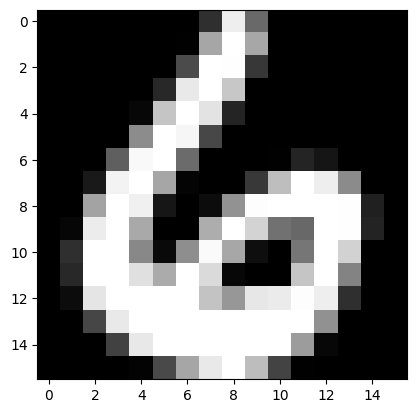

In [6]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Testing Multi Class Model

In [7]:
num_classes = 10

### One hot encode label

In [8]:
y_train_one_hot = np.eye(num_classes)[y_train]

In [9]:
y_train_one_hot[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

### Training the model

In [13]:
model = Sequentiel()

# no need for softmax activation because it is included in the loss function
model.add_module(Linear(input_size=256, output_size=10))

loss_func = CrossEntropyLoss()

optimizer = Optim(model,loss_func,1e-5)

batch_size = 256
epochs = 10000

losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)


Epoch 1/10000, Average Loss: 13.51370316387101
Epoch 1001/10000, Average Loss: 1.802416782811573
Epoch 2001/10000, Average Loss: 1.7473402505754154
Epoch 3001/10000, Average Loss: 1.7355638711930887
Epoch 4001/10000, Average Loss: 1.7312357135911038
Epoch 5001/10000, Average Loss: 1.7296282555731732
Epoch 6001/10000, Average Loss: 1.7285454228459425
Epoch 7001/10000, Average Loss: 1.728401082556706
Epoch 8001/10000, Average Loss: 1.7276188488380242
Epoch 9001/10000, Average Loss: 1.7267949363801693
Training finished.


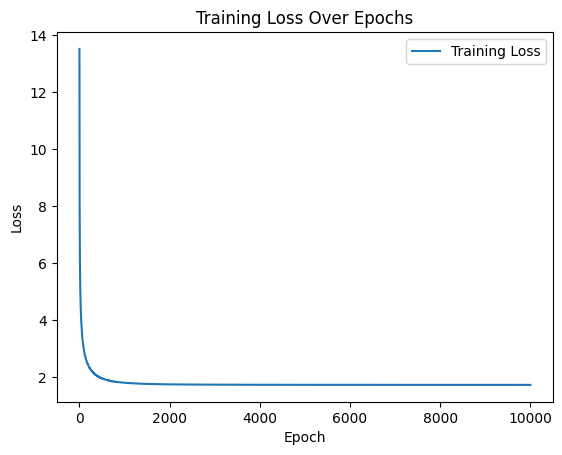

In [14]:
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y_pred = np.argmax(model.forward(X_test),axis=1)

accuracy = np.sum(y_test == y_pred)/len(y_test)

print(f'Accuracy = {accuracy}')

Accuracy = 0.8674638764324863
